# Batch Normalization - Forward
Batch Normalization (BN) 은 각 층의 출력값들을 정규화하는 방법입니다. BN은 Gradient Vanishing / Exploding을 예방하기 위해 만들어졌습니다.

BN은 기존의 ReLU, Regularization 등 간접적인 방법보다 직접적으로 학습 과정을 안정화하는 근본적인 방법으로 Internal Covariance Shift 현상을 막아줍니다.

Internal Covariance Shift(내부 공변량 변화)라는 현상은 모델의 각 층이나 Activation 마다 input의 분포가 달라지는 현상을 의미합니다.

위의 현상을 해결하기 위해 각 층의 input의 분포를 정규분포로 만들어주는 방법이 BN입니다.

### Forward
https://kasausyrzlhe1066469.cdn.ntruss.com/global/file/p/5d3572a6b1327a0575281aa3/BN_forward.JPG

Forward시 BN 알고리즘의 개요입니다. 위의 수식을 토대로 실습을 진행해보겠습니다.

BN을 모델에 적용할때는 Activation Function 이전에 넣어주는 방식으로 사용합니다.

관련 링크

https://arxiv.org/pdf/1502.03167.pdf
### 미션
설명의 수식 그림을 보고 이해해보세요.

수식을 기반으로 BN_forward() 함수를 완성해보세요.

BN_forward()를 거치고 나온 out을 ReLU() Activation function에 넣어주세요.

데이터 x의 분포가 어떻게 바뀌었는지 histogram()으로 확인해보세요.

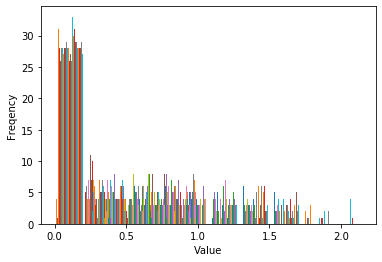

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# ReLU Activation Function 입니다.
def ReLU(x):
    return np.maximum(0,x)

# Feature의 히스토그램을 그려주는 메서드입니다.
def histogram(x):
    plt.hist(x)
    plt.xlabel('Value')
    plt.ylabel('Freqency')
#     plt.savefig('plot.png')

# Batch Normalization(BN)의 Feed Forward를 연산하는 메서드입니다.
# 단계적으로 BN의 식을 구현해보겠습니다.
def BN_forward(x, gamma, beta, eps):
    
    # Input Batch의 Shape 를 저장합니다.
    N, D = x.shape
    
    # Mean 값을 계산합니다.
    mu = 1./N * np.sum(x, axis = 0)
    
    # TODO : Input Batch에서 Mean값을 빼줍니다.
    xmu = x-mu

    # TODO : xmu 값을 제곱해줍니다. 
    sq = xmu**2
    
    # Variance를 계산합니다
    var = 1./N * np.sum(sq, axis = 0)
    
    # TODO : 분산 + Epsilon (아주 작은 값)에 루트를 씌워줍니다.
    sqrtvar = np.sqrt(var + eps)
    
    # TODO : 분산을 제곱한 값을 invert 시켜줍니다.
    ivar = 1./sqrtvar
    
    # TODO : 최종적으로 Normalize식인 xhat을 만들어줍니다.
    xhat =  xmu * ivar  #  (x-mu)/np.sqrt(var+eps) r
    
    # TODO :결과인 y를 만들어줍니다.
    out = gamma * xhat + beta
    
    # Backward에 사용하기 위한 값들을 저장해줍니다.
    values = (xhat,gamma,xmu,ivar,sqrtvar,var,eps)

    return out, values

# 임의의 Batch x를 만들어 줍니다.
np.random.seed(50)
x = np.random.rand(50,50)
# Batch의 histogram을 그려줍니다.
histogram(x)

# Gamma와 Beta의 초기값을 설정합니다.
gamma, beta, eps = 1, 0, 10e-7

# TODO : BN을 수행합니다.
out, _ = BN_forward(x,gamma,beta,eps)   
# TODO : BN을 수행한 후 ReLU Activation Function을 거쳐줍니다.
out = ReLU(out)

# BN_Forward를 거치고 난 후 결과를 그려줍니다.
histogram(out)

   


# Batch Normalization - Backward
BN의 Foward를 진행하고 나서 마찬가지로 모델을 학습할 때 처럼 Backpropagation을 진행합니다. Backward를 통해 다른 Weight를 학습하듯이 gamma와 beta를 학습합니다.

이번 실습에서는 BN의 Backward가 어떻게 진행되는지 확인해보겠습니다.

### Backward
https://kasausyrzlhe1066469.cdn.ntruss.com/global/file/p/5d368e6e0ddc240f8e67b757/BN_backward.JPG

BN의 Backward 수식은 위와 같습니다. BN_backward()에 위의 수식을 구현해보겠습니다.

관련 링크

https://arxiv.org/pdf/1502.03167.pdf
### 실습
BN_backward() 내에서 각각의 값에 대한 미분이 어떻게 이루어지는지 이해해보세요.

dxhat을 구해보세요.

dx1을 구해보세요.

dx를 구해보세요.

BN_forward()와 ReLU()를 수행해보세요.

BN_backward()를수행하고 histogram()을 통해 결과의 분포가 정규 분포와 유사한지 확인해보세요.

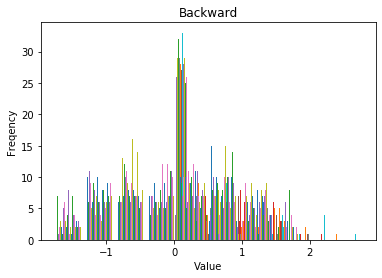

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# forward 메서드 입니다.
def BN_forward(x, gamma, beta, eps):
    N, D = x.shape
    mu = 1./N * np.sum(x, axis = 0)
    xmu = x - mu
    var = 1./N * np.sum(xmu**2, axis = 0)
    sqrtvar = np.sqrt(var + eps)
    ivar = 1./sqrtvar
    xhat = xmu * ivar
    out = (gamma * xhat) + beta
    values = (xhat,gamma,xmu,ivar,sqrtvar,var,eps)
    return out, values

# Backward 메서드입니다.
def BN_backward(dout, cache):
    # Forward에서 저장해 놓은 값 입력
    xhat,gamma,xmu,ivar,sqrtvar,var,eps = cache
    # 입력의 Shape 저장
    N,D = dout.shape
    
    # (dl/dgamma), (dl/dbeta)를 계산합니다.
    dbeta = np.sum(dout, axis=0)
    dgammax = dout
    dgamma = np.sum(dgammax*xhat, axis=0)
    
    # (dl/dxhat) 를 계산합니다.
    # TODO : 위의 계산한 값을 토대로 dxhat을 만들어주세요.
    dxhat = dgammax * gamma
    
    # (dl/dvar) 를 계산합니다.
    divar = np.sum(dxhat*xmu, axis=0)
    dsqrtvar = -1. /(sqrtvar**2) * divar
    dvar = 0.5 * 1. /np.sqrt(var+eps) * dsqrtvar
    
    # (dl/dmu) 를 계산합니다.
    dxmu1 = dxhat * ivar
    dsq = 1. /N * np.ones((N,D)) * dvar
    dxmu2 = 2 * xmu * dsq
    
    # TODO : 위의 계산한 값을 토대로 dx1을 만들어주세요.
    dx1 = (dxmu1 + dxmu2)
    
    # (dl/dx) 를 계산합니다.
    dmu = -1 * np.sum(dxmu1+dxmu2, axis=0)
    dx2 = 1. /N * np.ones((N,D)) * dmu
    
    # TODO : 위의 계산한 값을 토대로 dx를 만들어주세요.
    dx = dx1 + dx2
    
    # Update 된 dx, dgamma, dbeta를 반환합니다.
    return dx, dgamma, dbeta

# ReLU Activation Function 메서드입니다.
def ReLU(x):
    return np.maximum(0,x)
    
# 시각화를 위한 메서드입니다.
def histogram(x, title):
    plt.hist(x)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Freqency')
#     plt.savefig('plot.png')


# 임의의 batch x를 선언합니다.
np.random.seed(50)
x = np.random.rand(50,50)

# BN의 초기 파라미터를 설정합니다.
gamma, beta, epsilon = 1, 0, 10e-7
histogram(x, 'Origin')

# TODO : BN_forward를 수행해주세요.
out, cache = BN_forward(x,gamma, beta, epsilon)

# TODO : 결과를 ReLU 함수에 넣어주세요.
out = ReLU(out)
histogram(out,'Forward')

# TODO : BN_backward를 수행해주세요.
dx, dgamma, dbeta = BN_backward(out, cache)
histogram(dx, 'Backward')
   


# Keras로 구현하는 BN
실습 18-1, 18-2를 통해 Batch Normalization(BN)이 어떻게 연산되는지 자세히 분석해봤습니다.

BN은 현재 딥러닝 모델을 학습함에 있어 필수 요소로 여겨지고 있습니다. 그러나 복잡한 BN을 직접 구현하기에 어려움이 있으므로 Tensorflow -Keras에서는 BatchNormalization() 메서드를 통해 쉽게 BN을 사용할 수 있도록 만들었습니다.

이번 실습에서는 Keras를 이용해 BN Layer를 CNN에 추가해보고 BN을 적용한 CNN과 그렇지 않은 CNN을 비교해보겠습니다.

* tf.keras.layers.BatchNormalization()

    * BN의 내부 인자는 20개가 있습니다.
    * 자세한 설명은 아래의 링크에서 확인해보세요.
    * tf.keras.layers.Activation()

Activation Function을 추가합니다.
관련 링크

https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/BatchNormalization
### 실습
BN_model에 BatchNormalization Layer와 Activation function 'ReLU’를 추가해보세요.

BN은 Convolution layer와 Activation Function Layer 사이에 적용합니다.

CNN_model과 BN_model을 학습시키고 각각의 Loss가 어떻게 변하는지 확인해보세요.

uint8


W0805 18:32:10.725242 17536 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                100384    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 119,898
Trainable params: 119,898
Non-trainable params: 0
__________________________________________________

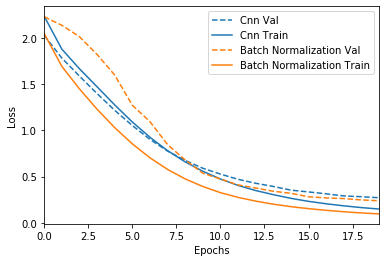

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import to_categorical


# 시각화 함수
def Visulaize(histories, key='loss'):
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])
    
#     plt.savefig("plot.png")

# MNIST DATA를 불러옵니다.
# 메모리 효율을 위해 Train 5000 / Test 1000개만 사용합니다.
mnist = np.load('./data/mnist.npz')
X_train, X_test, y_train, y_test = mnist['x_train'][:5000], mnist['x_test'][:1000], mnist['y_train'][:5000], mnist['y_test'][:1000]
print(X_train.dtype)

# 학습 전 Data Preprocessing
X_train = X_train.astype(np.float32) / 255.
X_test = X_test.astype(np.float32) / 255.
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)  

# BN을 적용하지 않은 일반 CNN 모델입니다.
CNN_model = keras.Sequential([
    keras.layers.Conv2D(32 ,kernel_size = (3,3), strides = (2,2), padding = 'same', activation=tf.nn.relu, input_shape=(28,28,1)),
    keras.layers.Conv2D(64 ,kernel_size = (3,3), strides = (2,2), padding = 'same', activation=tf.nn.relu),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation=tf.nn.sigmoid),
    keras.layers.Dense(16, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Batch Normalization을 적용한 모델입니다.
BN_model = keras.Sequential([
    keras.layers.Conv2D(32 ,kernel_size = (3,3), strides = (2,2), padding = 'same', input_shape=(28,28,1)),
    # TODO : BatchNormalization Layer를 추가해보세요.
    # BatchNoormalization은 Activation Function 이전에 적용합니다.
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    keras.layers.Conv2D(64 ,kernel_size = (3,3), strides = (2,2), padding = 'same'),
    # TODO : BatchNormalization Layer를 추가해보세요.
    # BatchNoormalization은 Activation Function 이전에 적용합니다.
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation=tf.nn.sigmoid),
    keras.layers.Dense(16, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# CNN model을 학습시켜줍니다.
CNN_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics = ['accuracy'])
CNN_model.summary()
CNN_history = CNN_model.fit(X_train,y_train,epochs= 20, batch_size = 100, validation_data=(X_test, y_test), verbose=2)

# BN model을 학습시켜줍니다.
BN_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics = ['accuracy'])
BN_model.summary()
BN_history = BN_model.fit(X_train, y_train, epochs= 20, batch_size = 100, validation_data=(X_test, y_test), verbose=2)

# 각 모델 별 Loss 그래프를 그려줍니다.
Visulaize([('CNN', CNN_history),('Batch Normalization', BN_history)])
              


# Transfer Learning (1)
전이 학습(Transfer Learning)은 기존의 학습된 모델을 사용하여 새로운 모델을 만들 때, 더 빠른 학습과 예측 성능을 높이는 방법입니다.

전이 학습을 사용하는 이유는 아래와 같습니다.

* 기존에 학습이 잘된 모델들이 많음
* 복잡한 모델일수록 새로운 학습에 많은 연산량, 메모리, 시간이 소요됨
* 실질적으로 처음부터 새로운 모델을 학습시키기 어려운 경우 사용
* 이미 잘 학습된 모델이 있고, 이 모델과 유사한 문제를 풀려할 때 전이 학습을 사용합니다.

--------------------------------

### Transfer Learning 구현
https://kasausyrzlhe1066469.cdn.ntruss.com/global/file/p/5d37bc28076d656952e478df/Transfer_learning.png

전이 학습을 구현하는데 있어 데이터의 양과 데이터의 유사도에 따른 표입니다.

1. 적은 양의 유사 데이터 - 데이터의 양이 적기 때문에 Overfitting을 방지하기 위해 뒤쪽의 Classifier만 학습

3. 적은 양의 다른 데이터 - 데이터의 양이 적기 때문에 뒤쪽의 Classifier만 학습하지만 성능 향상을 기대하기 힘듬

3. 많은 양의 유사 데이터 - Overfitting의 위험이 적으므로 전체 및 많은 Layer를 Fine-tuning

4. 많은 양의 다른 데이터 - 데이터가 다르기 때문에 전체 모델을 Fine-tuning

---------------------

전이 학습 실습에서 (0 ~ 4)의 MNIST 데이터만 학습시키고 (5 ~ 9)의 MNIST 데이터로 검증을 해보면 당연히 Test accuracy는 굉장히 낮습니다.

(0 ~ 4)의 MNIST 데이터로만 학습된 모델에 전이 학습을 적용시키기 위한 몇가지 작업을 이번 실습에서 진행해보겠습니다.

-------------------------

### 실습
[0 ~ 4] Label의 데이터로 CNN_model을 학습시켜보세요.

[5 ~ 9] Label의 데이터로 CNN_model을 검증해보세요.

Visulaize()로 학습이 어떻게 이루어졌는지 확인해보세요.

model.pop()로 Classifier 부분을 제거하고 summary()로 잘 제거가 되었는지 확인해보세요.

model.save_weights()로 학습된 Weight를 저장해보세요.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                32800     
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

W0805 18:37:35.133083 17536 training.py:1952] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                32800     
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

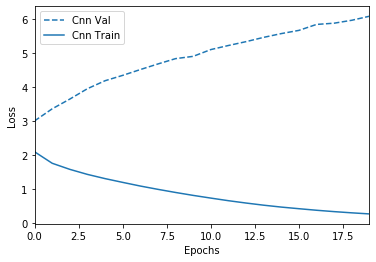

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

# 시각화 함수
def Visulaize(histories, key='loss'):
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])
#     plt.savefig("plot.png")

# MNIST 데이터 세트를 불러오고 Train과 Test를 나누어줍니다.
mnist = np.load('./data/mnist.npz')
X_train, X_test, y_train, y_test = mnist['x_train'][:5000], mnist['x_test'][:1000], mnist['y_train'][:5000], mnist['y_test'][:1000]

# Transfer Learning을 위해 MNIST 데이터를 나누어줍니다.
# Label값 (0 ~ 4 / 5 ~ 9)에 따라 5개씩 나누어줍니다.
x_mnist_04 = []
y_mnist_04 = []
x_mnist_59 = []
y_mnist_59 = []
 
for idx, label in enumerate(y_train):
    if label <= 4:
        x_mnist_04.append(X_train[idx])
        y_mnist_04.append(y_train[idx])
        
    else:
        x_mnist_59.append(X_train[idx])
        y_mnist_59.append(y_train[idx])
        
# (0 ~ 4)의 데이터로 학습하고 (5 ~ 9)의 데이터로 검증을 해보겠습니다.
X_train04, y_train04 = np.array(x_mnist_04), np.array(y_mnist_04)
X_test59, y_test59 = np.array(x_mnist_59), np.array(y_mnist_59)

# 나눈 MNIST 데이터 전처리
X_train04 = X_train04.astype(np.float32) / 255.
X_test59 = X_test59.astype(np.float32) / 255.

X_train04 = np.expand_dims(X_train04, axis=-1)
X_test59 = np.expand_dims(X_test59, axis=-1)

y_train04 = to_categorical(y_train04, 10)
y_test59 = to_categorical(y_test59, 10)

# CNN 모델 선언
CNN_model = keras.Sequential([
    keras.layers.Conv2D(32 ,kernel_size = (3,3), strides = (2,2), padding = 'same', activation=tf.nn.relu, input_shape=(28,28,1)),
    keras.layers.Conv2D(64 ,kernel_size = (3,3), strides = (2,2), padding = 'same', activation=tf.nn.relu),
    keras.layers.Conv2D(64 ,kernel_size = (3,3), strides = (2,2), padding = 'same', activation=tf.nn.relu),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation=tf.nn.sigmoid),
    keras.layers.Dense(16, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# CNN model을 학습시켜줍니다.
CNN_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics = ['accuracy'])
CNN_model.summary()

# TODO : [0 ~ 4] Label의 데이터로 `CNN_model`을 학습시키고 [5 ~ 9] Label의 데이터로 `CNN_model`을 검증해보세요.
CNN_history = CNN_model.fit(X_train04, y_train04,epochs= 20, batch_size = 100, validation_data=(X_test59, y_test59), verbose=2)

# 각 모델 별 Loss 그래프를 그려줍니다.
Visulaize([('CNN', CNN_history)])


################################################################################
# Transfer Learning을 위한 과정입니다.
# 학습된 CNN_model의 Classifier 부분인 Flatten() - Dense() layer를 제거해줍니다.
CNN_model.summary()
# TODO : Classifier 부분을 지워주세요.
# 총 3개의 Dense layer와 1개의 Flatten layer가 있으므로 4번 pop을 해줍니다.
#for i in range(4):
CNN_model.pop()
CNN_model.pop()
CNN_model.pop()
CNN_model.pop()


# Classifier를 지운 모델의 구조를 확인합니다.
CNN_model.summary()

# 이제 CNN_model에는 학습된 Convolution Layer만 남아있습니다.

# TODO : Convolution Layer의 학습된 Weight들을 저장합니다.
CNN_model.save_weights('CNN_model.h5', save_format='h5')
# 여기까지가 Transfer Learning의 1차 과정입니다.
# 다음 실습에서 이어서 Transfer Learning을 진행하겠습니다.


# Transfer Learning (2)
이번 실습에서는 Transfer Learning (1)에서 저장한 Weight 파일을 불러오고 새로운 Classifier를 더해 전이 학습을 마무리 해보겠습니다.

새로운 Classifier를 달아 학습을 진행할 때에 이미 학습된 Convolution layer는 학습에서 제외시켜야합니다.

------------------------
### 필요 메서드

* model.load_weights('*.h5') : h5 포맷의 Weight를 불러옵니다. 저장된 h5의 구조와 model의 구조가 같아야합니다.

* model.layers[] : 모델의 Layer 값을 포함하고 있습니다. Numpy 리스트처럼 Index / Slicing이 가능합니다.

* model.layers.trainable : 학습을 진행할지에 대한 여부를 결정할 수 있습니다.

    * True or False
### 실습
load_weights()로 Transfer_model에 학습된 CNN_model.h5를 넣어주세요.

새로운 Classifier를 Transfer_model에 붙여주세요.

summary()로 모델 구조를 확인해보고 각 Layer 별 Trainable 여부를 설정해주세요.

Transfer_model를 학습시키고 결과를 확인해보세요.

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 32)               

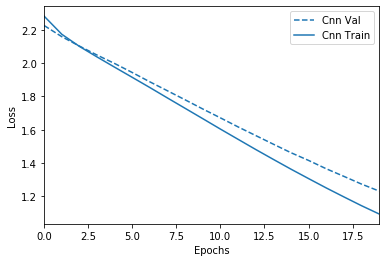

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import to_categorical


# 시각화 함수
def Visulaize(histories, key='loss'):
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])
#     plt.savefig("plot.png")

# MNIST Data를 Train과 Test로 나누어줍니다.
mnist = np.load('./data/mnist.npz')
X_train, X_test, y_train, y_test = mnist['x_train'][:500], mnist['x_test'][:500], mnist['y_train'][:500], mnist['y_test'][:500]

# MNIST Data를 전저리합니다.
X_train = X_train.astype(np.float32) / 255.
X_test = X_test.astype(np.float32) / 255.

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 이전 실습에서 사용했던 CNN_model과 같은 구조를 가진 모델을 선언합니다.
# 저장된 Weights를 불러오기 위해서는 모델의 구조가 같아야합니다.
Transfer_model = keras.Sequential([
    keras.layers.Conv2D(32 ,kernel_size = (3,3), strides = (2,2), padding = 'same', activation=tf.nn.relu, input_shape=(28,28,1)),
    keras.layers.Conv2D(64 ,kernel_size = (3,3), strides = (2,2), padding = 'same', activation=tf.nn.relu),
    keras.layers.Conv2D(64 ,kernel_size = (3,3), strides = (2,2), padding = 'same', activation=tf.nn.relu)
])

# TODO : Transfer_model 모델에 학습된 Weight를 넣어주세요.
Transfer_model.load_weights('./data/CNN_model.h5')

# TODO : 새로운 Classifier를 Transfer_model에 붙여주세요.
Transfer_model.add(keras.layers.Flatten())
Transfer_model.add(keras.layers.Dense(128, activation=tf.nn.sigmoid))
Transfer_model.add(keras.layers.Dense(64, activation=tf.nn.sigmoid))
Transfer_model.add(keras.layers.Dense(32, activation=tf.nn.sigmoid))
Transfer_model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
# Transfer_model.add(None)

# Transfer_model을 출력합니다.
Transfer_model.summary()


# 전체 모델에서 Classifier 부분만 학습하기 위해 Trainable 여부를 설정할 수 있습니다.
# TODO : 앞의 Convolution layer는 학습에서 제외하고 뒤의 Classifier 부분만 학습하기 위해 Trainable을 알맞게 설정해주세요.
for layer in Transfer_model.layers[:3]:
    layer.trainable=False
for layer in Transfer_model.layers[3:]:
    layer.trainable=True

# Transfer_model을 학습시켜줍니다.
Transfer_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics = ['accuracy'])
Transfer_history = Transfer_model.fit(X_train, y_train, epochs= 20, batch_size = 100, validation_data=(X_test, y_test), verbose=2)

Visulaize([('CNN', Transfer_history)])




# Classifier 바꾸기
앞서 실습한 내용을 토대로 CNN을 입맛대로 바꾸는 미션을 진행해보겠습니다.

BatchNormalization을 추가하고 Classifier를 바꿔 MNIST 데이터의 분류 성능을 97% 이상 나오도록 CNN을 구성해보세요.

### 미션
3개의 Conv2D(), 3개의 BatchNormalization()을 추가해주세요.

CNN_model의 기존 Classifier를 제거해주세요.

CNN_without_classifier에 새로운 Classifier를 달아주세요.

* Dense : 3개
* Output : 1개 - 10개 클래스 분류
* CNN_with_newclassifier를 학습시켜보세요.

Test_accuracy를 97% 이상 나오도록 모델을 학습시켜보세요.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical

# 시각화 함수
def Visulaize(histories, key='loss'):
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])
#     plt.savefig("plot.png")

# MNIST Data를 Train과 Test로 나누어줍니다.
mnist = np.load('./data/mnist.npz')
X_train, X_test, y_train, y_test = mnist['x_train'][:10000], mnist['x_test'][:1000], mnist['y_train'][:10000], mnist['y_test'][:1000]

# MNIST Data를 전저리합니다.
X_train = X_train.astype(np.float32) / 255.
X_test = X_test.astype(np.float32) / 255.

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 이전 실습에서 사용했던 CNN_model과 같은 구조를 가진 모델을 선언합니다.
# 저장된 Weights를 불러오기 위해서는 모델의 구조가 같아야합니다.
CNN_model = keras.Sequential([
    # TODO : 3개의 Convolution Layer, 3개의 BatchNormalization을 추가해주세요.
    keras.layers.Conv2D(32 ,kernel_size = (3,3), strides = (2,2), padding = 'same', input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    keras.layers.Conv2D(64 ,kernel_size = (3,3), strides = (2,2), padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    keras.layers.Conv2D(32 ,kernel_size = (3,3), strides = (2,2), padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation = tf.nn.relu),
    keras.layers.Dense(32, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])
# 초기 모델을 저장합니다.
origin_CNN = keras.models.clone_model(CNN_model)
# TODO : 기존의 Classifier를 제거한 후 CNN_without_classifier에 모델을 저장해주세요.
# pop()를 사용하세요.
for i in range(4):
    CNN_model.pop()

# Classifier를 제거한 모델을 저장합니다.
CNN_without_classifier = keras.models.clone_model(CNN_model)

# TODO : 3개의 Fully Connected layer와 1개의 Output Layer를 새로 달아주세요.
# add()를 사용하세요.
CNN_model.add(Flatten())
CNN_model.add(Dense(32, activation = tf.nn.relu))
CNN_model.add(Dense(64, activation = tf.nn.relu))
CNN_model.add(Dense(32, activation = tf.nn.relu))
CNN_model.add(Dense(10, activation = tf.nn.softmax))

# 새로운 Classifier를 부착한 모델을 저장합니다.
CNN_with_newclassifier = keras.models.clone_model(CNN_model)

# CNN_with_newclassifier을 출력합니다.
CNN_with_newclassifier.summary()

# TODO : CNN_with_newclassifier을 학습시켜 보세요.
CNN_with_newclassifier.compile(optimizer='adam',loss='categorical_crossentropy', metrics = ['accuracy'])
CNN_history = CNN_with_newclassifier.fit(X_train, y_train, epochs= 20, batch_size = 100, validation_data=(X_test, y_test), verbose=2)
# TODO : Test_accuracy가 97% 이상 나오도록 학습시켜보세요.
loss, Test_accuracy = CNN_with_newclassifier.evaluate(X_test, y_test)

Visulaize([('CNN', CNN_history)])



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 7, 7, 64)          256       
_________________________________________________________________
activation_3 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 32)         